![title](qgr.png)

# Understanding Option Greeks

In [4]:
import numpy as np
import pandas as pd
from qfin.options import BlackScholesCall
import matplotlib.pyplot as plt

In [5]:
np.__version__

'1.21.2'

In [6]:
pd.__version__

'1.3.2'

### Welcome to Quant Guild Research!

In this notebook we aim to provide an intuitive and visual understanding of option greeks.

General knowledge of options and the difference between their price today and at expiration is recommended before proceeding.

In order to compute the greeks we must first assume a model, for this example we will select the infamous Black-Scholes model:


$$C = \Phi(d_1) S_t - \Phi(d_2) K e^{-rt}$$
$$d1 = \frac{ln(\frac{S_t}{K}) + (r+\frac{\sigma^2}{2})t}{\sigma \sqrt t}$$
$$d2 = d_1 - \sigma \sqrt t$$

Where
- $\Phi$ is the normal cumulative distribution function
- $S_t$ is the spot price at time $t$
- $\sigma$ is volatility
- $K$ is the strike price of the option
- $r$ is the risk-free rate of interest
- $t$ is the time to expiration

Fortunately, the QFin Python package has a BlackScholesCall class that makes it easy to visualize an option's price.

Let's visualize an option's price fixing every parameter of the option except the spot price:

In [15]:
# Fixed option parameters
sigma = .3
K = 100
r = 0
t = 1

# Varying spot price
S_t = np.linspace(60, 110, 100)

# For option class storage
options = []

# Create an option for each spot price
for i in range(len(S_t)):
    options.append(BlackScholesCall(S_t[i], sigma, K, t, r))

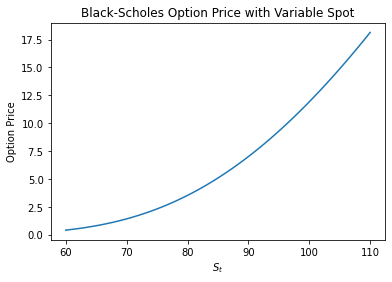

In [23]:
# For storing option prices
option_prices = []

# Get the option prices from each class
for option in options:
    option_prices.append(option.price)

# Plot the varying spots with the respective option prices
plt.xlabel('$S_t$')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Price with Variable Spot')
plt.plot(S_t, option_prices)

We can see that different spot prices with the same fixed parameters (volatility, time to maturity, risk-free rate, and strike price) yield different prices.

Suppose you own the option where currently the spot is trading for 85: $S_t = 85$

In [25]:
print('Black-Scholes Price: ', BlackScholesCall(85, sigma, K, t, r).price)

Black-Scholes Price:  5.093107981057017


and you wanted to know how much you can expect the price to change if thhe spot increases to $86$.  

This is where the greeks come into play.

Each greek is the partial derivative of the model price with respect to one of its variables.

In this case we are going to look at the partial derivative with respect to the spot price: delta.

Delta can be derived mathematically by taking the first-order partial derivative of the Black-Scholes model with respect to the spot price:

$$\frac{\delta C}{\delta S_t} = \frac{\delta}{\delta S_t} [\Phi(d_1) S_t - \Phi(d_2) K e^{-rt}] = \Phi(d1) - 0 = \Phi(d1)$$

In [29]:
print('Black-Scholes Delta: ', BlackScholesCall(85, sigma, K, t, r).delta)

Black-Scholes Delta:  0.3476289474497055


Those particularly keen will notice that the Black-Scholes model is non-linear and using the first-order partial derivative to derive sensitivity to an input is a linear process - this is true yielding some error commonly referred to as hedging error.

We can add this line to our pricing equation using point-slope form:

$$y - 5.0931 = .3476(x - 85)$$

In [30]:
x = np.linspace(60, 110, 1000)
y = .3476*(x - 85) + 5.0931

This also means the further we get away from $S_t = 85$ the worse our approximation for change will get:

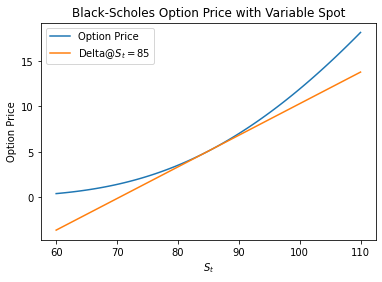

In [34]:
plt.xlabel('$S_t$')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Price with Variable Spot')
plt.plot(S_t, option_prices, label='Option Price')
plt.plot(x, y, label='Delta@$S_t=85$')
plt.legend()

So how much can we expect our option price to change from the original 5.093 if the price were to increase to $86$?

We can use delta (our linear approximation) to find out!

In [40]:
new = .3476*(86 - 85) + 5.0931
print('Delta@S_t=85 for 86: ', new)

Delta@S_t=85 for 86:  5.4407


Notice that the value for delta is quoted in terms of the $change$ in value, we add the original option price at $S_t=85$ to yield the appropriate price on the line!

Let's see what the value would really be at $86$ using the pricing solution:

In [41]:
print('Black-Scholes Price: ', BlackScholesCall(86, sigma, K, t, r).price)
print('Hedging Error: ', BlackScholesCall(86, sigma, K, t, r).price - new)

Black-Scholes Price:  5.44798933663143
Hedging Erorr:  0.007289336631430388


Not a bad approximation!  But notice how it gets worse the further you get from the initial spot value:

In [42]:
# Consider now the price at 100
new = .3476*(100 - 85) + 5.0931
print('Black-Scholes Price: ', BlackScholesCall(100, sigma, K, t, r).price)
print('Hedging Error: ', BlackScholesCall(100, sigma, K, t, r).price - new)

Black-Scholes Price:  11.923538474048499
Hedging Erorr:  1.6164384740484987


A much larger error!  This means we would want to recompute the delta as the spot price changes to provide a more accurate approximation.

This is exactly what traders do!  

Traders assume some model and use sensitivities derived in this fashion to manage their exposure by buying and selling both the underlying and other options.

© 2022, Quant Guild